### Lending Club - Example Case

using Python and Scikit-learn to apply decision tree and random forest classification to a real world case:
- Lending Club connects people who need money (borrowers) with people who have money (investors)
- as an investor, people who showed a profile of having a high probability of paying back are preferred
- a decision tree / random forest model can help to predict default rate

some context:
- Lending Club hat a very interesting year in [2016](https://en.wikipedia.org/wiki/LendingClub#2016_to_present)
- data is from 2007-2010 [Source](https://www.lendingclub.com/auth/login?login_url=%2Fstatistics%2Fadditional-statistics%3F)
- data provided has been cleaned of NA values

This data set contains the following features:
- 'credit.policy': 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- 'purpose': The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- 'int.rate': The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- 'installment': The monthly installments owed by the borrower if the loan is funded.
- 'log.annual.inc': The natural log of the self-reported annual income of the borrower.
- 'dti': The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- 'fico': The FICO credit score of the borrower.
- 'days.with.cr.line': The number of days the borrower has had a credit line.
- 'revol.bal': The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- 'revol.util': The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- 'inq.last.6mths': The borrower's number of inquiries by creditors in the last 6 months.
- 'delinq.2yrs': The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- 'pub.rec': The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('loan_data.csv')

In [3]:
# view data
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# exploratory analysis
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

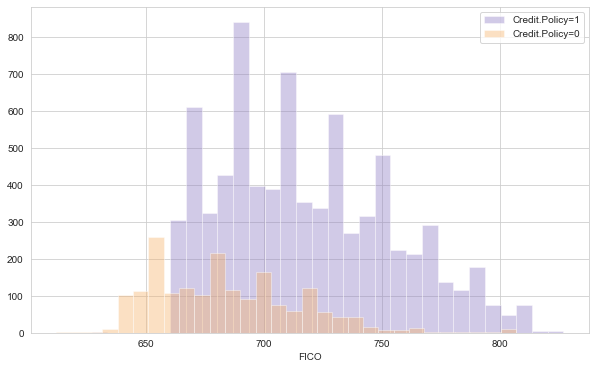

In [20]:
# comparing FICO distributions based on credit.policy outcome
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

sns.distplot(df[df['credit.policy']==1]['fico'], label='Credit.Policy=1', kde=False, bins=30, color='#8e7cc3')
sns.distplot(df[df['credit.policy']==0]['fico'], label='Credit.Policy=0', kde=False, bins=30, color='#f6b26b')

plt.legend()
plt.xlabel('FICO')

Overall, more people who met the credit policy criteria are included with a defined start at roughlty 660 FICO Score. Having a higher FICO score seems to result in meeting the credit underwriting criteria more often.

Text(0.5, 0, 'FICO')

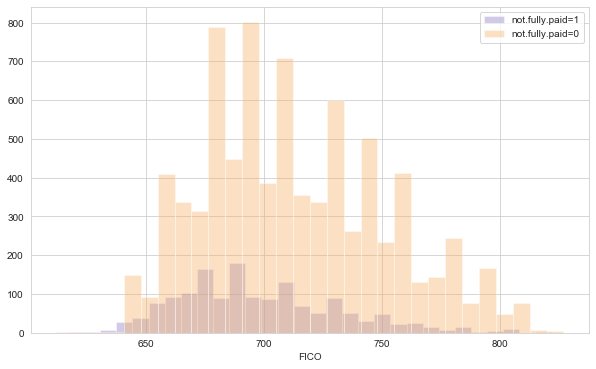

In [21]:
# comparing FICO distributions based on not.fully.paid variable
plt.figure(figsize=(10,6))

sns.distplot(df[df['not.fully.paid']==1]['fico'], label='not.fully.paid=1', kde=False, bins=30, color='#8e7cc3')
sns.distplot(df[df['not.fully.paid']==0]['fico'], label='not.fully.paid=0', kde=False, bins=30, color='#f6b26b')

plt.legend()
plt.xlabel('FICO')

No very obvious correlation between FICO score and payback of credit can be observed when looking at the distribution.

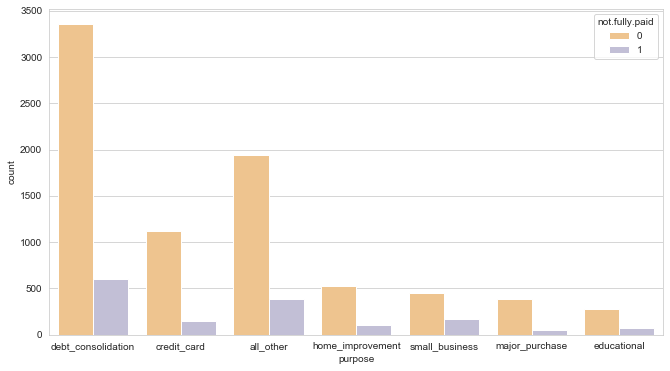

In [37]:
# compare dept purpose to not.fully.paid variable
plt.figure(figsize=(11,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='PuOr')

Dept consolidation is the most used purpose for using Lending Clud, followed by Credit Card.
The proportion between dept paid and dept not fully paid seems similar across different dept purposes.

Text(0.5, 85.99999999999991, 'FICO')

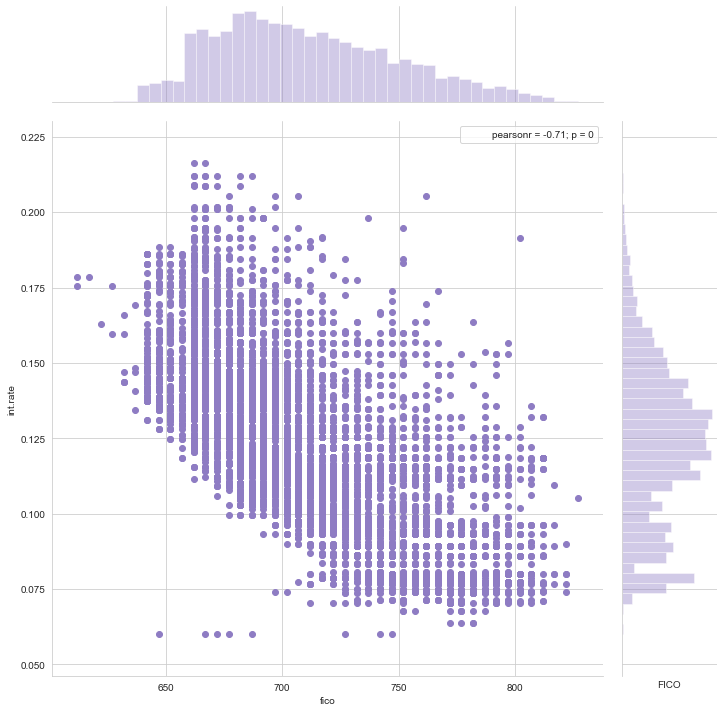

In [63]:
# visualizing interest rate based on FICO Score
from scipy import stats
sns.jointplot(x='fico', y='int.rate', data=df, height=10,
              color='#8e7cc3', stat_func=stats.pearsonr)
plt.xlabel('FICO')

Both, the visualization as well as corresponding Pearson's r (r = -0.71) show a negative correlation between interest rate given to a lender and his FICO Score.

Text(0.5, 19.799999999999983, 'FICO')

<Figure size 720x432 with 0 Axes>

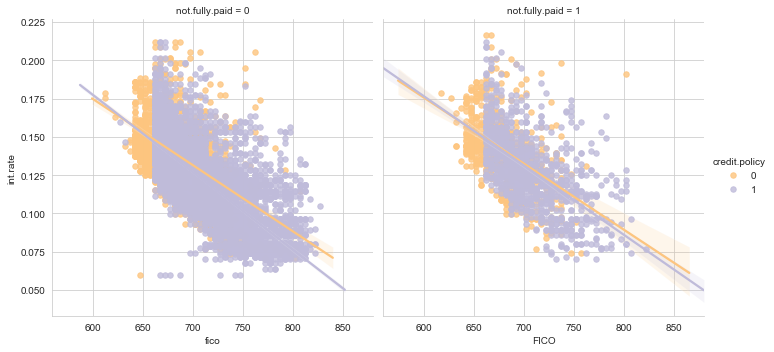

In [73]:
# focusing more on the correlation shown above,
# a comparison based on dept status is visualized
plt.figure(figsize=(10,6))
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy',
           col='not.fully.paid', palette='PuOr', scatter_kws={'s': 30})
plt.xlabel('FICO')

For both, depts fully paid and not fully paid, as well as borrowers meeting and not meeting the credit underwriting criteria, the relationship betweet FICO Score and interest rate is negative (and strongly so).

Further, the interest rate drops of slightly less for borrowers not meeting the credit underwriting criteria.

#### Predicting credit default

Now we will take a look at how good we can predict if people pay back the whole dept.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [81]:
# for easier handeling, 'purpose' column is coded as dummy variable
purpose_df = df['purpose']
purpose_df= pd.get_dummies(purpose_df, columns=df['purpose'].unique(),
                           drop_first=True)
purpose_df.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [91]:
# dummy variable and data set are combined
df_final = df.drop(labels='purpose', axis=1)
df_final = pd.concat([df_final, purpose_df],axis=1)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [96]:
# data is split for training and testing

X= df_final.drop(labels='not.fully.paid', axis=1)
y= df_final['not.fully.paid']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
# importing decision tree, assigning object and fitting model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
# get predictions using fitted model and evaluate mode
dtree_predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,dtree_predictions))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dtree_predictions)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2420
           1       0.22      0.25      0.23       454

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874



array([[2017,  403],
       [ 340,  114]], dtype=int64)

Using a simple decision tree, predicting whether a dept will be paid back to its full extend works fairly well for cases that did not pay back their dept (f1-score = 0.84).

For those that did pay back their dept, the prediction performed a lot worse (f1-score = 0.23). Of those, 340 out of 454 cases were predicted wrong (340 false negative).

Overall performance can be described moderately successful with precision, recall and f1-score around 0.75.

In [101]:
# next, a random forest is used to increase prediction performance
# therefore, model is imported, assigned and fitted
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [102]:
# fit model and get predictions
rfc_pred = rfc.predict(X_test)

In [104]:
# get predictions using fitted model and evaluate mode
print(classification_report(y_test,rfc_pred))
confusion_matrix(y_test, rfc_pred)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2420
           1       0.30      0.02      0.03       454

    accuracy                           0.84      2874
   macro avg       0.57      0.50      0.47      2874
weighted avg       0.76      0.84      0.77      2874



array([[2404,   16],
       [ 447,    7]], dtype=int64)

Again, the model works well and even sligtly better with predicting a borrower not paying back their dept (f1-score = 0.91).

For borrower paying back their dept, the model performed worse over all evaluation metrics.

First, this seems like a major decrease of performance overall. For lenders it is more important to correctly predict if a user does not pay back their dept, as this leads to definitive loss of money and can be included in financial calculations.
On the contrary, not predicting someone is actually paying back their dept and therefore not giving a credit is 'only' considered opportunity costs. 

Overall, the accuracy could be increased to 0.84 from 0.74 using a random forest compared to a single decision tree.